# Explore US States Information
#### This project is to explore the information about the US states based on the following features: suicide rate, crime rate, GDP rate, sun time hour, tempreture,  average income and cost of living. The data I downloaded was from official website. 

In [1]:
import numpy as np 
import pandas as pd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
plotly.tools.set_credentials_file(username='ymzheng', api_key='wTr1mzE36lExNFtuGYg8')
# magic word for producing visualizations in notebook
%matplotlib inline
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
import plotly.graph_objs as go

import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Explore the suicide death rate of US States
#### From https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm, the suicide death rate is the number of deaths per 100,000 total population

### Data Preprocessing

In [2]:
df_14=pd.read_csv('SUICIDE2014.csv')
df_15=pd.read_csv('SUICIDE2015.csv')
df_16=pd.read_csv('SUICIDE2016.csv')
df_17=pd.read_csv('SUICIDE2017.csv')
df_14['year']='2014'
df_15['year']='2015'
df_16['year']='2016'
df_17['year']='2017'
df=df_14.append([df_15,df_16,df_17])
df=df.rename(index=str,columns={'STATE':'State'})
df.head()

,State,RATE,DEATHS,URL,year
0,AL,15.7,788,/nchs/pressroom/states/alabama/alabama.htm,2014
1,AK,25.8,193,/nchs/pressroom/states/alaska/alaska.htm,2014
2,AZ,17.7,"1,271",/nchs/pressroom/states/arizona/arizona.htm,2014
3,AR,18.2,555,/nchs/pressroom/states/arkansas/arkansas.htm,2014
4,CA,10.5,"4,294",/nchs/pressroom/states/california/california.htm,2014


#### Only the abbreviation name of the states was included in the table, I need to join another table to get the full name of each states

In [3]:
state=pd.read_excel('us_state.xlsx') 
state.head()

,State,Code,State Name
0,AK,2,ALASKA
1,AL,1,ALABAMA
2,AR,5,ARKANSAS
3,AS,60,AMERICAN SAMOA
4,AZ,4,ARIZONA


In [4]:
df=pd.merge(df,state, how='left', on='State')

In [5]:
df.head()

,State,RATE,DEATHS,URL,year,Code,State Name
0,AL,15.7,788,/nchs/pressroom/states/alabama/alabama.htm,2014,1,ALABAMA
1,AK,25.8,193,/nchs/pressroom/states/alaska/alaska.htm,2014,2,ALASKA
2,AZ,17.7,"1,271",/nchs/pressroom/states/arizona/arizona.htm,2014,4,ARIZONA
3,AR,18.2,555,/nchs/pressroom/states/arkansas/arkansas.htm,2014,5,ARKANSAS
4,CA,10.5,"4,294",/nchs/pressroom/states/california/california.htm,2014,6,CALIFORNIA


### Draw a US suicide map, with the slider of the year from 2014 to 2017

In [6]:
data_slider = []
#### I populate the data object
scl = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                               [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]
for year in df.year.unique():

    # I select the year 
    df_sected_crime = df[ (df['year']== year )]

    for col in df_sected_crime.columns:  # I transform the columns into string type so I can:
        df_sected_crime[col] = df_sected_crime[col].astype(str)

    ### I create the text for mouse-hover for each state, for the current year    
    df_sected_crime['text'] = df_sected_crime['State Name'] + '<br>' + \
                                'Rate: '+ df_sected_crime['RATE']
    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['State'],
                        z=df_sected_crime['RATE'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        text = df_sected_crime['text'],
                        colorbar = go.choropleth.ColorBar(
        title = "US States Suicide Death Rate")
                        )
                        

    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider
    

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2014)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)


##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

# I set up the layout (including slider option)

layout = dict(
    title = go.layout.Title(
            text = 'US State Suicide Death Rate'
        ),
    geo=dict(scope='usa',
            projection={'type': 'albers usa'}),
              sliders=sliders)


# I create the figure object:

fig = dict(data=data_slider, layout=layout) 

# to plot in the notebook

plotly.offline.iplot(fig)

# to plot in a separete browser window

offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,image_width=2000, image_height=1000, 
              filename='firsttry', validate=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `firsttry` didn't end with .html. Adding .html to the end of your file.



'firsttry.html'

#### From the above map, in 2014-2017, Montana, Alaska, Wyoming  always had the top suicide death rate, while states in the east and west bay had lower suicide death rate. 

## Explore the GDP rate of US States
#### From https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP, the rate of GDP means the percent of the state GDP  in the nation.

### Data Preprocessing

In [7]:
gdp_data=pd.read_csv('GDP.csv')
result = pd.merge(gdp_data,state, how='left', on='Code')
result.head()

,Code,State_x,year,rate,State_y,State Name
0,23,Maine,1997,0.4,ME,MAINE
1,25,Massachusetts,1997,2.8,MA,MASSACHUSETTS
2,26,Michigan,1997,3.5,MI,MICHIGAN
3,30,Montana,1997,0.2,MT,MONTANA
4,32,Nevada,1997,0.7,NV,NEVADA


###  Draw a US GDP map, with the slider of the year from 1997 to 2016

In [8]:
data_slider = []
#### I populate the data object
scl = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                               [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]

for year in result.year.unique():

    # I select the year 
    df_sected_crime = result[ ((result['year']== year) & (result['State_y']!= 'DC' ))]

    for col in df_sected_crime.columns:  # I transform the columns into string type so I can:
        df_sected_crime[col] = df_sected_crime[col].astype(str)

    ### I create the text for mouse-hover for each state, for the current year    
    df_sected_crime['text'] = df_sected_crime['State_x'] + '<br>' + \
                                'Rate: '+ df_sected_crime['rate']
    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['State_y'],
                        z=df_sected_crime['rate'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        text = df_sected_crime['text'],
                        colorbar = go.choropleth.ColorBar(
        title = "US States GDP Rate")
                        )
                        

    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider
    

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1997)
               ) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    

##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

# I set up the layout (including slider option)

layout = dict(
    title = go.layout.Title(
            text = ' US States GDP Rate'
        ),
    geo=dict(scope='usa',
            projection={'type': 'albers usa'}),
              sliders=sliders)


# I create the figure object:

fig = dict(data=data_slider, layout=layout) 

# to plot in the notebook

plotly.offline.iplot(fig)

# to plot in a separete browser window

offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_gdp_slider" ,image_width=2000, image_height=1000, 
              filename='firsttry', validate=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



'firsttry.html'

#### From the map above, Calniforia, Texas and New York always had the top GDP contribution rate, while the state in the midwest are relatively poor.

## Explore the crime rate of US States
####  from https://www.ucrdatatool.gov/Search/Crime/State/StatebyState.cfm, rates are the number of reported offenses per 100,000 population

### Data Preprocessing

In [9]:
crime=pd.read_excel('crime_rate.xlsx') 
state=pd.read_excel('us_state.xlsx') 
crime=crime[['State Name','year','rate']]
crime['State Name']=crime['State Name'].str.upper()

In [10]:
new_crime=pd.merge(crime,state, how='left', on='State Name')
new_crime.head()

,State Name,year,rate,State,Code
0,ALABAMA,2010,383.7,AL,1
1,ALASKA,2010,635.3,AK,2
2,ARIZONA,2010,413.6,AZ,4
3,ARKANSAS,2010,503.5,AR,5
4,CALIFORNIA,2010,439.6,CA,6


### Draw a US Crime Rate map, with the slider of the year from 2010 to 2014

In [11]:
data_slider = []
#### I populate the data object
scl = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                               [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]

for year in new_crime.year.unique():

    # I select the year 
    df_sected_crime = new_crime[ ((new_crime['year']== year) & (new_crime['State']!= 'DC' ))]

    for col in df_sected_crime.columns:  # I transform the columns into string type so I can:
        df_sected_crime[col] = df_sected_crime[col].astype(str)

    ### I create the text for mouse-hover for each state, for the current year    
    df_sected_crime['text'] = df_sected_crime['State Name'] + '<br>' + \
                                'Rate: '+ df_sected_crime['rate']
    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['State'],
                        z=df_sected_crime['rate'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        text = df_sected_crime['text'],
                        colorbar = go.choropleth.ColorBar(
        title = "US States Crime Rate")
                        )

    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider
    

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2010)
               ) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    

##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

# I set up the layout (including slider option)

layout = dict(
    title = go.layout.Title(
            text = ' US States Crime Rate (Rates are the number of reported offenses per 100,000 population)'
        ),
    geo=dict(scope='usa',
            projection={'type': 'albers usa'}),
              sliders=sliders)


# I create the figure object:

fig = dict(data=data_slider, layout=layout) 

# to plot in the notebook

plotly.offline.iplot(fig)

# to plot in a separete browser window

offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,image_width=2000, image_height=1000, 
              filename='firsttry', validate=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



'firsttry.html'

## Explore the sunny hour of US States
#### from https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php, sunday hour was the Average Annual Sunshine by State

In [12]:
sun=pd.read_excel('sun_state.xlsx') 
new_sun = pd.merge(sun,state, how='left', on='State Name')
new_sun.head()

,State Name,Sunday Hour,State,Code
0,ALABAMA,2641,AL,1
1,ALASKA,2061,AK,2
2,ARIZONA,3806,AZ,4
3,ARKANSAS,2771,AR,5
4,CALIFORNIA,3055,CA,6


### Draw a US sunday hour map

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

for col in new_sun.columns:
    new_sun[col] = new_sun[col].astype(str)

scl = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                               [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]
new_sun['text'] = (new_sun['State Name']) + '<br>' + \
    'Sunday Hour ' + (new_sun['Sunday Hour'])

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = new_sun['State'],
    z = new_sun['Sunday Hour'].astype(float),
    locationmode = 'USA-states',
     text = new_sun['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Sunday Hour")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US State Sunday Hour '
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(116,173,209)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ymzheng/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Here we see the states in the south west have more sunday hours, while the states in the north east have less snuday hours.

## Explore the tempretures of US States
#### Data are collected from NOAA National Climatic Data Center of the United States, temperatures are based on data collected by weather stations throughout each state during the years 1971 to 2000 and made available.

### Data Preprocessing

In [14]:
tempreture=pd.read_excel('us_tempreture.xlsx') #The temperatures are based on data collected by weather stations throughout each state during the years 1971 to 2000 and made available 
#by the NOAA National Climatic Data Center of the United States.
new_tempreture = pd.merge(tempreture,state, how='left', on='State Name')

### Draw a US tempreture map

In [15]:
for col in new_tempreture.columns:
    new_tempreture[col] = new_tempreture[col].astype(str)

scl = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                               [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]
new_tempreture['text'] = (new_tempreture['State Name']) + '<br>' + \
    'Sunday Hour ' + (new_tempreture['tempreture'])

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = new_tempreture['State'],
    z = new_tempreture['tempreture'].astype(float),
    locationmode = 'USA-states',
     text = new_tempreture['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Avg °C")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US State Average Tempreture (°C) '
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(116,173,209)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ymzheng/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


#### From the above figure, the pattern of the tempreture in US states follows the common sense. The south places have higher tempretures while the north places have lower tempretures

## Explore the cost of living of US states
#### strived from https://www.missourieconomy.org/indicators/cost_of_living/, Cost of Living Data Series Annual Average 2018

### Data Proprocessing

In [16]:
# Cost of Living Data Series Annual Average 2018
# strived from https://www.missourieconomy.org/indicators/cost_of_living/
cost_living=pd.read_excel('us_living_cost.xlsx')
new_cost = pd.merge(cost_living,state, how='left', on='State Name')
new_cost.head()

,State Name,cost living,State,Code
0,ALASKA,130.6,AK,2
1,ALABAMA,89.5,AL,1
2,ARKANSAS,88.4,AR,5
3,ARIZONA,97.7,AZ,4
4,CALIFORNIA,138.7,CA,6


### Draw a US cost of living map

In [17]:
for col in new_cost.columns:
    new_cost[col] = new_cost[col].astype(str)

scl = [[0, 'rgb(166,206,227)'], [0.2, 'rgb(31,120,180)'], [0.3, 'rgb(178,223,138)'], 
                               [0.4, 'rgb(51,160,44)'], [0.5, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]
new_cost['text'] = (new_cost['State Name']) + '<br>' + \
    'Average Cost Of Living ' + (new_cost['cost living '])

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = new_cost['State'],
    z = new_cost['cost living '].astype(float),
    locationmode = 'USA-states',
     text = new_cost['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Average Cost Of Living")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US State Average Cost Of Living'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(116,173,209)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ymzheng/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


#### From the above map, Hawaii has the most personal cost of living, following by the Calnifonia. 

## Explore the average income of US states
#### strived from https://www.infoplease.com/business-finance/poverty-and-income/capita-personal-income-state, Per Capita Personal Income by State in 2015 

### Data Preprocessing

In [18]:
income=pd.read_excel('us_income.xlsx')
new_income = pd.merge(income,state, how='left', on='State Name')

In [19]:
new_income.head()

,State Name,income,State,Code
0,ALABAMA,38965,AL,1
1,ALASKA,55940,AK,2
2,ARIZONA,39060,AZ,4
3,ARKANSAS,39107,AR,5
4,CALIFORNIA,52651,CA,6


### Draw a US personal income map

In [59]:
for col in new_income.columns:
    new_income[col] = new_income[col].astype(str)

scl = [[0, 'rgb(166,206,227)'], [0.1, 'rgb(31,120,180)'], [0.2, 'rgb(178,223,138)'], 
                               [0.3, 'rgb(51,160,44)'], [0.5, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']]
new_income['text'] = (new_income['State Name']) + '<br>' + \
    'Average Income ' + (new_income['income'])

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = new_income['State'],
    z = new_income['income'].astype(float),
    locationmode = 'USA-states',
     text = new_income['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Average Personal Income")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'US State Average Personal Income'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(116,173,209)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ymzheng/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


#### From the above figure, we can find the east and west bay areas have the most personal income.

## Conduct PCA

### Data Preprocessing

In [21]:
suicide_rate=df.groupby(['State Name']).mean()['RATE'].to_frame()
suicide_rate.rename(columns={'RATE':'suicide_rate'},inplace=True)
suicide_rate.head()

,suicide_rate
State Name,
ALABAMA,15.725
ALASKA,26.375
ARIZONA,17.950
ARKANSAS,19.075
CALIFORNIA,10.450


In [22]:
crime_rate=crime.groupby(['State Name']).mean().rate.to_frame()
crime_rate.rename(columns={'rate':'crime_rate'},inplace=True)
crime_rate.head()

,crime_rate
State Name,
ALABAMA,422.44
ALASKA,624.80
ARIZONA,414.38
ARKANSAS,479.74
CALIFORNIA,414.60


In [23]:
gdp=result.groupby(['State Name']).mean()['rate'].to_frame()
gdp.rename(columns={'rate':'gdp_rate'},inplace=True)

In [24]:
gdp.columns

Index(['gdp_rate'], dtype='object')

In [25]:
test=pd.concat([crime_rate,gdp,suicide_rate],axis=1)
test['State Name'] = test.index
test.head()

,crime_rate,gdp_rate,suicide_rate,State Name
ALABAMA,422.44,1.18,15.725,ALABAMA
ALASKA,624.80,0.33,26.375,ALASKA
ARIZONA,414.38,1.66,17.950,ARIZONA
ARKANSAS,479.74,0.70,19.075,ARKANSAS
CALIFORNIA,414.60,13.36,10.450,CALIFORNIA


In [26]:
sun=new_sun[['Sunday Hour','State Name']]
tempreture=new_tempreture[['tempreture','State Name']]
income=new_income[['income','State Name']]
cost=new_cost[['cost living ','State Name']]                  

In [27]:
test.head()

,crime_rate,gdp_rate,suicide_rate,State Name
ALABAMA,422.44,1.18,15.725,ALABAMA
ALASKA,624.80,0.33,26.375,ALASKA
ARIZONA,414.38,1.66,17.950,ARIZONA
ARKANSAS,479.74,0.70,19.075,ARKANSAS
CALIFORNIA,414.60,13.36,10.450,CALIFORNIA


In [28]:
income.head()

,income,State Name
0,38965,ALABAMA
1,55940,ALASKA
2,39060,ARIZONA
3,39107,ARKANSAS
4,52651,CALIFORNIA


In [29]:
test=test.merge(sun, left_on='State Name', right_on='State Name')

In [30]:
test=test.merge(tempreture, left_on='State Name', right_on='State Name')

In [31]:
test=test.merge(income, left_on='State Name', right_on='State Name')

In [32]:
test=test.merge(cost, left_on='State Name', right_on='State Name')

In [33]:
import openpyxl

In [34]:
#test.to_excel("output.xlsx")

In [35]:
clustering_data=pd.read_excel('output.xlsx')

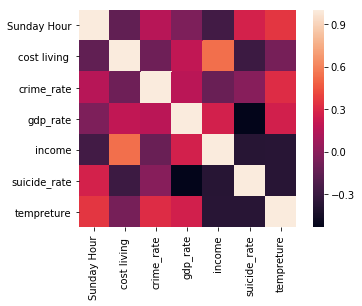

In [41]:
wh1 = clustering_data[clustering_data.columns.difference(['State Name'])]#Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [53]:
#Scaling of data
from sklearn.preprocessing import StandardScaler  # For scaling dataset
ss = StandardScaler()
wh1_no = pd.DataFrame(ss.fit_transform(wh1))
wh1_no.columns = wh1.columns

In [54]:
wh1_no.head()

,Sunday Hour,cost living,crime_rate,gdp_rate,income,suicide_rate,tempreture
0,-0.228055,-0.772687,0.506126,-0.351338,-1.048625,-0.077654,1.243932
1,-1.863099,1.363658,2.075174,-0.706297,1.357261,2.288689,-2.918993
2,3.056129,-0.346457,0.443631,-0.150890,-1.035161,0.416723,0.953977
3,0.138421,-0.829864,0.950416,-0.551785,-1.028500,0.666689,0.974688
4,0.939029,1.784690,0.445337,4.735026,0.891107,-1.249715,0.850422


In [39]:
#create a new dataframe wh2_no which has the state name information to better plot on the map
wh2_no=wh1_no
wh2_no.insert(0,'State Name',clustering_data.iloc[:,3])

### Apply PCA to the data

In [44]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(wh1_no)

#check the dimensionality of pca
pca.components_.shape


(7, 7)

### Investigate the variance accounted for by each principal component

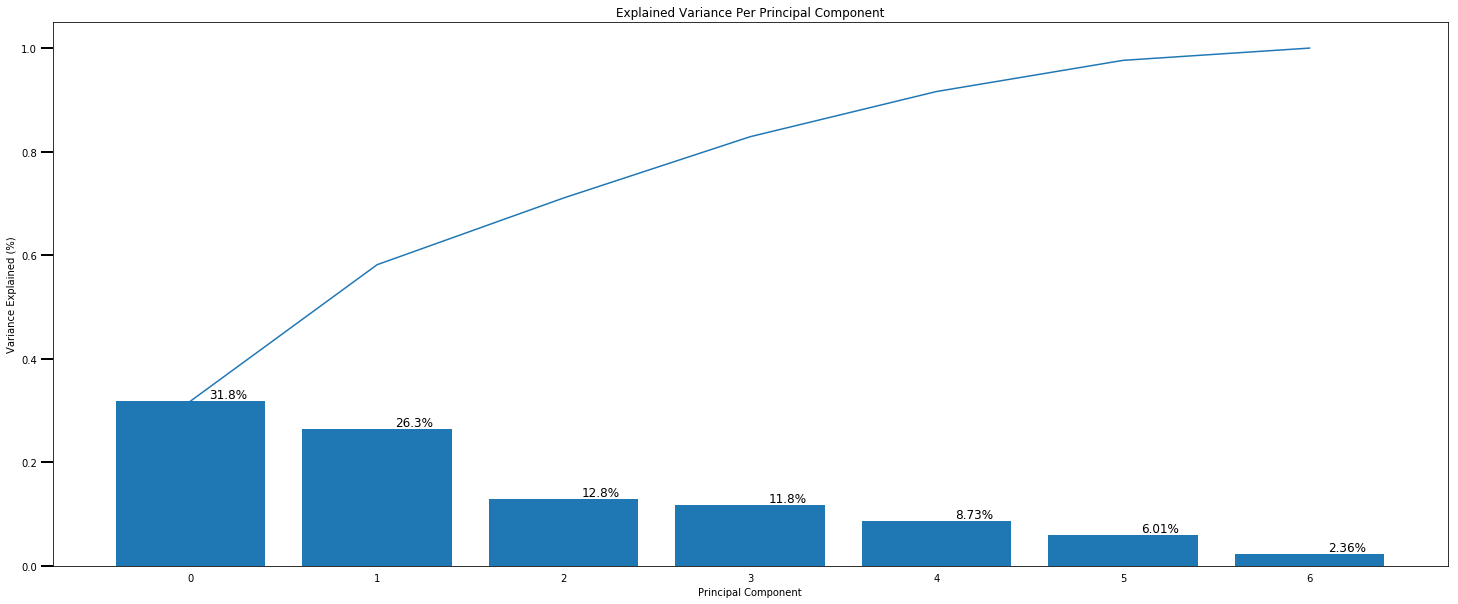

In [42]:
def scree_plot(pca): #referenced from helper_functions.py for Interpret_PC_Results_SC
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(25, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

### Draw biplot
#### A biplot allows information on both samples and variables of a data matrix to be displayed graphically. Samples are displayed as points while variables are displayed either as vectors

In [275]:
from adjustText import adjust_text
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    t=wh2_no['State']
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()
    ax.scatter(xs, ys)
#     bars = ax.bar(xs, ys, width=0.001, facecolor='k')
    
    
    
    for i, txt in enumerate(t):
        ax.annotate(txt, (xs[i], ys[i]), horizontalalignment='left')
#     adjust_text(ax, add_objects=bars, autoalign='y', expand_objects=(0.1, 1),
#             only_move={'points':'', 'text':'y', 'objects':'y'}, force_text=0.75, force_objects=0.1,
#             arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='r', lw=0.5, alpha=0.5))
#     plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*6, coeff[i,1]*6,color = 'r',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0] , coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center',fontsize=12)
        else:
            plt.text(coeff[i,0]* 6, coeff[i,1] * 6, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=12)
    plt.xlim(-3,4.2)
    plt.ylim(-3.2,4.2)
    plt.xlabel("PC{}".format(1),fontsize=20)
    plt.ylabel("PC{}".format(2),fontsize=20)
    plt.grid(linewidth=1)
    fig.set_figheight(8)
    fig.set_figwidth(8)



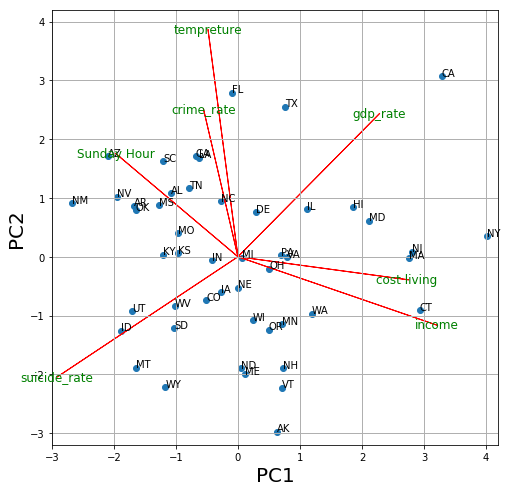

In [276]:
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]),wh1_no.columns)

#### From the figure, we can  find the following information: the correlation between different features. For example, crime rate has positive correlation with tempreture, suicide rate has nagative correlation with gdp rate. We can also find the information about one state, for example, as for CA, it has high cost of living, high income, high crime rate and low suicide rate. You can use this plot to find the suitable state considering of different features.

## Visualization of US states based on the clustering results

###  k-Means algorithm
#### In general, k-means is the first choice for clustering because of its simplicity. Here, the user has to define the number of clusters 

#### Find the best k for the clustering using elbow rule.

In [46]:
def get_kmeans_score(data, center): #referenced from Changing K - Solution

    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    #Then fit the model to data using the fit method
    model = kmeans.fit(data)
    
    #Obtain a score related to the model fit
    score = np.abs(model.score(data)) # Sum of distances of samples to their closest cluster center.
    
    return score

Text(0.5, 1.0, 'SSE vs. K')

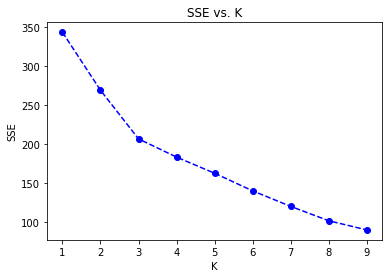

In [47]:
scores = []
centers = list(range(1,10))

for center in centers:
    scores.append(get_kmeans_score(wh1_no, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')

Text(0.5, 1.0, 'SSE Slope vs. K')

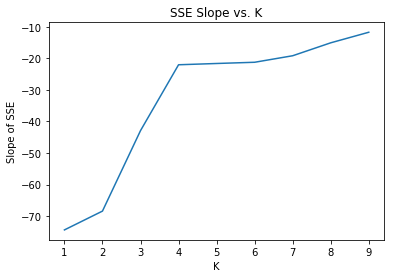

In [48]:
plt.plot(centers, np.gradient(scores))
plt.xlabel('K')
plt.ylabel('Slope of SSE')
plt.title('SSE Slope vs. K')

#### Finally, choose 4 for the value of k

#### Prepare the map

In [49]:
#K means Clustering 
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1_no, 4)
kmeans = pd.DataFrame(clust_labels)
wh1_no.insert((wh1_no.shape[1]),'kmeans',kmeans)

In [50]:
#create a new dataframe wh2_no which has the state name information to better plot on the map
wh2_no=wh1_no
wh2_no.insert(0,'State Name',clustering_data.iloc[:,3])
wh2_no=pd.merge(wh2_no,state, how='left', on='State Name')
wh2_no.head()

,State Name,Sunday Hour,cost living,crime_rate,gdp_rate,income,suicide_rate,tempreture,kmeans,State,Code
0,ALABAMA,-0.228055,-0.772687,0.506126,-0.351338,-1.048625,-0.077654,1.243932,2,AL,1
1,ALASKA,-1.863099,1.363658,2.075174,-0.706297,1.357261,2.288689,-2.918993,3,AK,2
2,ARIZONA,3.056129,-0.346457,0.443631,-0.150890,-1.035161,0.416723,0.953977,2,AZ,4
3,ARKANSAS,0.138421,-0.829864,0.950416,-0.551785,-1.028500,0.666689,0.974688,2,AR,5
4,CALIFORNIA,0.939029,1.784690,0.445337,4.735026,0.891107,-1.249715,0.850422,1,CA,6


In [51]:
scl = [[0, 'green'], [0.3, 'blue'], [0.5, 'yellow'], [1, 'red']]
data = [dict(type='choropleth',
             locations = wh2_no['State'],
             locationmode = 'USA-states',
             z = wh2_no['kmeans'],
             text = wh2_no['State Name'],
             colorscale =scl ,
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of US States based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'albers usa'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

### Agglomerative Clustering

#### Also known as Hierarchical clustering, does not require the user to specify the number of clusters. Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.

Python Tip: Though providing the number of clusters is not necessary but Python provides an option of providing the same for easy and simple use.

In [55]:
def doAgglomerative(X, nclust=4):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1_no, 4)
agglomerative = pd.DataFrame(clust_labels1)
wh1_no.insert((wh1_no.shape[1]),'agglomerative',agglomerative)

In [56]:
wh1_no.insert(0,'State Name',clustering_data.iloc[:,3])

In [57]:
wh_agg=pd.merge(wh1_no,state, how='left', on='State Name')
wh_agg.head()

,State Name,Sunday Hour,cost living,crime_rate,gdp_rate,income,suicide_rate,tempreture,agglomerative,State,Code
0,ALABAMA,-0.228055,-0.772687,0.506126,-0.351338,-1.048625,-0.077654,1.243932,2,AL,1
1,ALASKA,-1.863099,1.363658,2.075174,-0.706297,1.357261,2.288689,-2.918993,0,AK,2
2,ARIZONA,3.056129,-0.346457,0.443631,-0.150890,-1.035161,0.416723,0.953977,2,AZ,4
3,ARKANSAS,0.138421,-0.829864,0.950416,-0.551785,-1.028500,0.666689,0.974688,2,AR,5
4,CALIFORNIA,0.939029,1.784690,0.445337,4.735026,0.891107,-1.249715,0.850422,3,CA,6


In [58]:
scl = [[0, 'green'], [0.3, 'blue'], [0.5, 'yellow'], [1, 'red']]
data = [dict(type='choropleth',
             locations = wh_agg['State'],
             locationmode = 'USA-states',
             z = wh_agg['agglomerative'],
             text = wh_agg['State Name'],
             colorscale =scl ,
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of US States based on Agglomerative Clustering',
              geo=dict(showframe = False,
                       projection = {'type':'albers usa'}))
map2 = go.Figure(data = data, layout=layout)
iplot(map2)

#### Compared these two clustering result, New York, Maryland, New Jersey, Connecticut and Massachusett are similiar. States in the middle of the US ( like Missori, Kansas) are similar to each other. States in the north west ( like Idaho and Montana) are also similar to each other.  The clustering presents the trend of geographical division which also means geographic location can influence one state. 